**COMP3670/6670 Tutorial Week 7 - Regression**
---

THEORY SECTION
--- 

Regression and gradient descent are pillars in machine learning. 

The first part of this tutorial to go over the lecture slides in regression and gradient descent.  

**PRIORITIES:**
1. Ensure you understand **every step** of (stochastic) gradient desent.
2. Ensure you could can derive the gradient of regression problems with or without regression. 

Once that's all done, revisit the clustering section. Did you understand everything here as well? Unsupervised learning is important because it not only has immediate practical uses but is more relevant to the development of AGI (Artificial General Intelligence) than supervised (labelled) learning. If you don't understand this paragraph, please ask your tutor to clarify the meaning of supervised and unsupservised learning.

**PROGRAMMING SECTION**
---

We're going to do a simple scalar linear regression with gradient descent.


-----------

   **TASK:** 
   
   1. Randomly generate a matrix $X \in \mathbb{R}^{m \times n}$, where each row of $X$ is a training example.
   2. Choose a vector $t \in \mathbb{R}^{n \times 1}$.
   3. Generate $Y$ by $Xt = Y$.
   4. Then generate a random matrix $\theta \in \mathbb{R}^{n \times 1}$.
   5. Implement gradient descent to approximate $t$ with $\theta$.
   6. Check your gradient descent algorithm correctly approximated $t$. Talk to your classmates and tutor to make sure if you're unsure.
   7. Verify your answer with the closed form solution employing the Moore-Penrose inverse.
   
Note that in the above we're essentially pretending we don't know $t$. Obviously, if we have $t$, linear regression with gradient descent would be unnecessary, but the point is to help you understand what gradient descent is doing.


-----------

**GENERAL COURSE HINTS:** 
- $n$ can be any number you like, but be reasonable.
- If you need extra study materials, Stanford and MIT both have some amazing freely available course content online. Look up "Machine Learning Stanford CS229" or "CS221" or "CS221N" for details.
- Wikipedia is your friend. It's not always right, but it's always there for you.

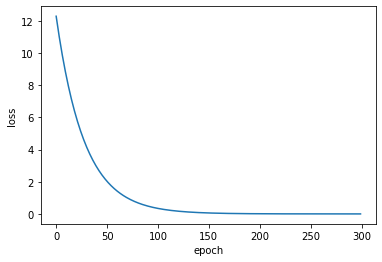

Analytic Solution:
 [[ 0.96191081]
 [-1.63472546]
 [ 0.66975393]]
Gradient Descent Solution:
 [[ 0.9525    ]
 [-1.62799664]
 [ 0.65430673]]
t:
 [[ 0.96191081]
 [-1.63472546]
 [ 0.66975393]]


In [1]:
# YOUR CODE HERE.
import numpy as np
import matplotlib.pyplot as plt

# set m,n
m = 200
n = 3

# generate data
X = np.random.randn(m, n)  # step 1
t = np.random.randn(n, 1)  # step 2
Y = X @ t# step 3
theta = np.random.randn(n, 1)  # step 4

# gradient descent 
epoch = 300
lr = 0.01 # learning rate
N = m
loss_record = []
for _ in range(epoch):
    # for record
    loss = (Y - X @ theta).T @ (Y - X @ theta) / N
    loss_record.append(loss.item())
    # update
    gradient = (-2 * Y.T @ X + 2 * theta.T @ X.T @ X) / N
    theta = theta - lr * gradient.T

# plot
plt.plot(loss_record)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# check
theta_closed_form = np.linalg.inv(X.T @ X) @ X.T @ Y
print("Analytic Solution:\n", theta_closed_form)
print("Gradient Descent Solution:\n", theta)
print("t:\n", t)

-----------
**Extended Task:** We study various influence factors in training a linear regression model in this task.

1. noise. When collecting real-world data, it is common that there would be noise included. Adding noise to your generated data and see how would this influence the parameter estimation.

2. sample amount. Sometimes it is expensive to collect data while a lot of parameters need to be trained. Let's study the effect of training example amount. That is changing the $m$ for $X \in \mathbb{R}^{m \times n}$ and compare the final loss fixing training epoch and learning rate. 

3. learning rate. How would the learning rate influence the convergence of the optimization process?

-----------
**Hint**
- You can add noise by settting $Y=Xt+\epsilon$ where $\epsilon \sim \mathcal{N}(\mu,\sigma^2)$.

In [ ]:
# YOUR CODE HERE.

In [2]:
def gradient_descent(X,Y,epoch,lr):
    N = X.shape[0]
    theta = np.random.randn(X.shape[1], 1)  # parameter
    loss = []
    for _ in range(epoch):
        loss.append(((Y - X @ theta).T @ (Y - X @ theta) / N).item())
        theta = theta - lr * ((-2 * Y.T @ X + 2 * theta.T @ X.T @ X) / N).T # update
    return theta,loss

In [3]:
# noise
m = 200
n = 3
X = np.random.randn(m, n)
t = np.random.randn(n, 1)
Y = X @ t
Y_tilde = X @ t + np.random.randn(m,1)
theta_1,_=gradient_descent(X,Y,epoch=500,lr=0.01) # without noise
theta_2,_=gradient_descent(X,Y_tilde,epoch=500,lr=0.01) # with noise

print("Euclidean Distance:")
print("without noise\t",np.linalg.norm(theta_1-t))
print("noise\t\t",np.linalg.norm(theta_2-t))
print("Gradient Descent Solution")
print("without noise：\n", theta_1)
print("with noise：\n", theta_2)
print("t:\n", t)

Euclidean Distance:
without noise	 0.00030023491886784474
noise		 0.11943160916885565
Gradient Descent Solution
without noise：
 [[-1.53489754]
 [-0.79391168]
 [-0.31676272]]
with noise：
 [[-1.55649534]
 [-0.91148281]
 [-0.31058471]]
t:
 [[-1.53490825]
 [-0.79417325]
 [-0.31661573]]


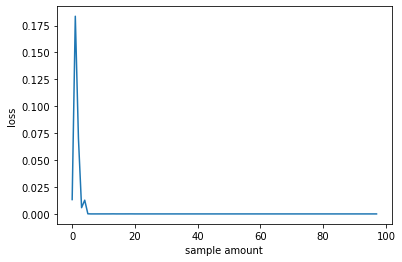

In [4]:
# sample amount
n = 3
X = np.random.randn(100, n)
Y = X @ np.random.randn(n, 1)
# training
all_loss_record=np.zeros(100-2)
for i in range(10):
    loss_record=[]
    for m in range(2,100):
        _,loss=gradient_descent(X[:m],Y[:m],epoch=500,lr=0.01)
        loss_record.append(loss[-1])
    all_loss_record+=np.array(loss_record)
# plot
plt.plot(all_loss_record)
plt.xlabel('sample amount')
plt.ylabel('loss')
plt.show()

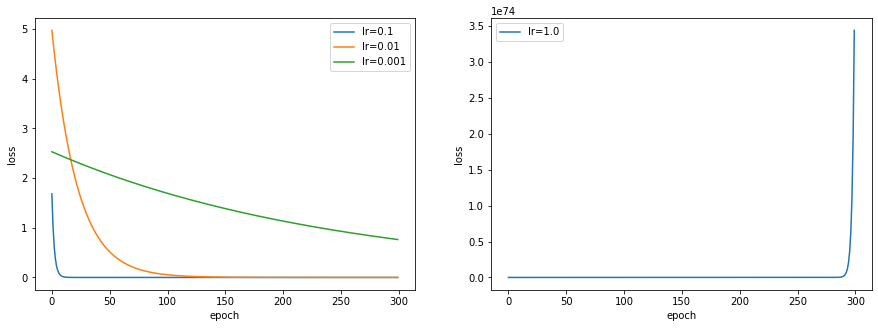

In [4]:
# learning rate
m=100
n = 3
X = np.random.randn(m, n)
Y = X @ np.random.randn(n, 1)
# training
loss_record={}
for i in range(4):
    lr=1/10**i
    _,loss=gradient_descent(X,Y,epoch=300,lr=lr)
    loss_record[str(lr)]=np.array(loss)
    
# plot
fig=plt.figure(figsize=(15,5))
fig.add_subplot(121)
for i in range(3):
    lr=0.1/10**i
    plt.plot(loss_record[str(lr)],label='lr='+str(lr))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
fig.add_subplot(122)
plt.plot(loss_record["1.0"],label='lr=1.0')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()